# Detection of distracted driver using Convolutional Neural Networks

### Thamizhiniyan Pugazhenthi - 200941620

### Introduction

Machine learning  is the study of computer algorithms that may improve themselves over time by gaining experience and using data. Machine learning algorithms create a model based on training data to make predictions or judgments without having to be explicitly programmed to do so. Like the description, we will build a model to detect the distracted driver with Machine Learning using Convolutional Neural Networks and train the model with the training and validation set before predict them with the test images given.

### Dataset description

The dataset had set of training and test images. The training data splitted into ten classes from c0 to c9. The 10 classes to predict are:

    c0: normal driving
    c1: texting - right
    c2: talking on the phone - right
    c3: texting - left
    c4: talking on the phone - left
    c5: operating the radio
    c6: drinking
    c7: reaching behind
    c8: hair and makeup
    c9: talking to passenger
    
Along with the set of images, two csv files were presented to assist our project. One with the details about the name of the images along with the class and another sample csv to show the submission format of the project.

### Libraries

The libraries were imported to support our project. The assistance of tensorflow and keras is vital to proceed ahead. With matplot to plot charts and pandas to perform csv read and write operations.

In [43]:
import os
from os.path import join
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

### Model

The Convolutional Neural Network was constructed with input size of (100,100) with the '3' represents 'rgb' format of the image. With Batch normalization, we can standardize the data in between convolutional layers. Maxpooling is to find out the maximum value from the region covered by filter and the data will be converted to one dimensional array using flatten and dropout will help us to prevent overfitting. The hidden dense layers were added to improve efficiency and with the final dense layer represents output with 10 classes. The optimizer 'adam' was used to compile the model.

In [3]:
cnnmodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
cnnmodel.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
cnnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 49, 49, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 49, 49, 64)        2

### Data preprocessing

The working directory was set to acccess the folder contains training images.

In [4]:
workingdir = os.path.abspath('')
trainingdirectory = os.path.join(workingdir + '/state-farm-distracted-driver-detection/imgs/train/')

### Train and validation dataset split

Image generator was built to get access of images from the training folder. The data augumentation was used to generalize the model with horizontal flip, width and heigth shift range and rotation range. To improve the model, the training data were splitted into training and validation data in the ratio of 80:20. From the generator, the training and validation set can be accessed in the batch size of 64.

In [5]:
trainingdataimage = ImageDataGenerator(rescale = 1./255, height_shift_range = 0.2,
                                        width_shift_range = 0.2, shear_range = 0.2, rotation_range = 40, zoom_range = 0.2, 
                                        fill_mode = 'nearest', horizontal_flip = True, validation_split = 0.2)
trainingset = trainingdataimage.flow_from_directory(trainingdirectory, 
                                                            target_size = (100, 100), batch_size = 64, 
                                                            class_mode = 'categorical', subset = 'training', shuffle = True)
validationset = trainingdataimage.flow_from_directory(trainingdirectory, 
                                                            target_size = (100, 100), batch_size = 64, 
                                                            class_mode = 'categorical', subset = 'validation', shuffle = True)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


### Model fit

The training and validation images made to fit with the CNN model on 60 iterations with steps per iteration will be length of the image generator of training set and length of image generator of validation set was denoted as validation steps.

In [6]:
history =  cnnmodel.fit(trainingset, epochs = 100, steps_per_epoch = len(trainingset), 
                             validation_data = validationset, verbose = 1, validation_steps = len(validationset))

Epoch 1/100
281/281 [==============================] - 148s 488ms/step - loss: 2.4414 - accuracy: 0.1635 - val_loss: 4.3076 - val_accuracy: 0.1029
Epoch 2/100
281/281 [==============================] - 122s 435ms/step - loss: 1.8286 - accuracy: 0.3173 - val_loss: 1.9818 - val_accuracy: 0.2584
Epoch 3/100
281/281 [==============================] - 130s 464ms/step - loss: 1.4419 - accuracy: 0.4667 - val_loss: 1.4742 - val_accuracy: 0.4720
Epoch 4/100
281/281 [==============================] - 138s 491ms/step - loss: 1.1670 - accuracy: 0.5744 - val_loss: 1.1714 - val_accuracy: 0.5775
Epoch 5/100
281/281 [==============================] - 138s 490ms/step - loss: 0.9647 - accuracy: 0.6579 - val_loss: 1.0323 - val_accuracy: 0.6523
Epoch 6/100
281/281 [==============================] - 141s 502ms/step - loss: 0.7974 - accuracy: 0.7266 - val_loss: 1.0666 - val_accuracy: 0.6746
Epoch 7/100
281/281 [==============================] - 139s 493ms/step - loss: 0.6497 - accuracy: 0.7790 - val_loss: 1

281/281 [==============================] - 125s 446ms/step - loss: 0.1398 - accuracy: 0.9593 - val_loss: 0.4562 - val_accuracy: 0.8753
Epoch 57/100
281/281 [==============================] - 126s 449ms/step - loss: 0.1296 - accuracy: 0.9607 - val_loss: 0.3413 - val_accuracy: 0.9141
Epoch 58/100
281/281 [==============================] - 127s 453ms/step - loss: 0.1247 - accuracy: 0.9628 - val_loss: 0.2970 - val_accuracy: 0.9125
Epoch 59/100
281/281 [==============================] - 125s 445ms/step - loss: 0.1313 - accuracy: 0.9622 - val_loss: 0.4540 - val_accuracy: 0.8732
Epoch 60/100
281/281 [==============================] - 128s 454ms/step - loss: 0.1260 - accuracy: 0.9628 - val_loss: 0.3031 - val_accuracy: 0.9217
Epoch 61/100
281/281 [==============================] - 128s 454ms/step - loss: 0.1252 - accuracy: 0.9628 - val_loss: 0.1651 - val_accuracy: 0.9514
Epoch 62/100
281/281 [==============================] - 126s 449ms/step - loss: 0.1312 - accuracy: 0.9608 - val_loss: 0.2239 

### Plot to show training accuracy vs validation accuracy

The two plots were designed to visualize the learning curve of the model. One plot concentrated on Training and validation accuracy over 60 iterations and next one concentrated on training and validation loss.

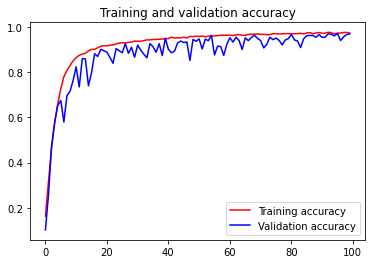

<Figure size 432x288 with 0 Axes>

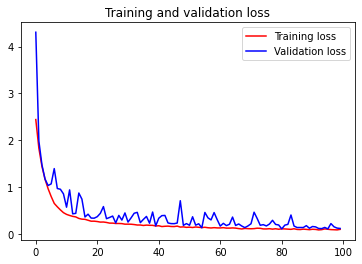

<Figure size 432x288 with 0 Axes>

In [7]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'red', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, validation_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

### Test data prediction

Like training data, image generator were built for test data along with its directory. The important step of the project is the prediction of test images with the learning the CNN model has undergone with training and validation images.

In [8]:
testparentdirectory = os.path.join(workingdir + '/state-farm-distracted-driver-detection/imgs/')
testdataimage = ImageDataGenerator(rescale = 1./255)
testdata = testdataimage.flow_from_directory(testparentdirectory, classes=['test'], target_size = (100,100))
testoutput = cnnmodel.predict(testdata, verbose = 1)

Found 79726 images belonging to 1 classes.
2492/2492 [==============================] - 425s 170ms/step


### Preparing output dataframe

The sample submission csv was read by pandas to prepare the format of output. With image and images name taken from the csv, the prediction values was replaced with the original value of csv in the same format and convert it to a dataframe to export it easily into a csv file.

In [9]:
specimencsv = pd.read_csv(os.path.join(workingdir + '/state-farm-distracted-driver-detection/sample_submission.csv'))
result = {'img':list(specimencsv.values[:,0]),}
for value in range(0,10):
    result['c' + str(value)] = list(testoutput[:,value])

In [10]:
testoutput = pd.DataFrame(result)

### Exploratory data analysis

The number of images in each class were depicted with a bar plot.

Text(0.5, 1.0, 'Number of images per class in training data')

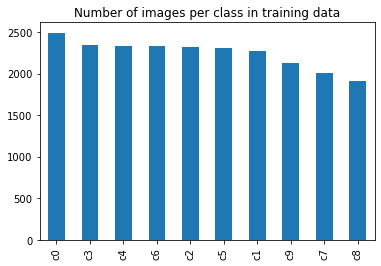

In [45]:
imagescsv = pd.read_csv(os.path.join(workingdir + '/state-farm-distracted-driver-detection/driver_imgs_list.csv'))
imagescsv.classname.value_counts().plot(kind = 'bar')
plt.title('Number of images per class in training data')

In [35]:
testvalue = testoutput[['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']].idxmax(axis = 1)

Text(0.5, 1.0, 'Number of images per class in test data')

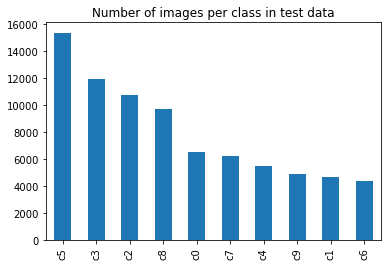

In [44]:
testvalue.value_counts().plot(kind = 'bar')
plt.title('Number of images per class in test data')

### Preparing output file

Then, the csv had been written from the 'testoutput' dataframe.

In [13]:
testoutput.to_csv('Testoutput.csv', index = False, encoding='utf-8')

### Conclusion

We built a model using Convolution Neural Networks with data augumentation, Batch Normalization and Dropout to increase the efficiency of the model. Thus, the prediction of test images from the model with the learning of training and validation images was successfully exported to a csv file with over 97% accuracy.

### References

1. https://www.tensorflow.org/tutorials/keras/classification
2. https://www.tensorflow.org/tutorials/images/cnn
3. https://charon.me/posts/keras/keras2/
4. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
5. https://www.tensorflow.org/guide/keras/train_and_evaluate